Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 114ms/step - accuracy: 0.3272 - loss: 3.4264 - val_accuracy: 0.5422 - val_loss: 2.4267
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 249s 159ms/step - accuracy: 0.4549 - loss: 2.6713 - val_accuracy: 0.5404 - val_loss: 2.3210
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 158ms/step - accuracy: 0.5200 - loss: 2.3424 - val_accuracy: 0.6015 - val_loss: 2.0340
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 249s 159ms/step - accuracy: 0.5583 - loss: 2.1013 - val_accuracy: 0.6151 - val_loss: 1.8640
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 250s 160ms/step - accuracy: 0.5939 - loss: 1.9109 - val_accuracy: 0.6354 - val_loss: 1.7200
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 249s 159ms/step - accuracy: 0.6065 - loss: 1.7783 - val_accuracy: 0.6112 - val_loss: 1.7721
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5602s 4s/step - accuracy: 0.6271 - loss: 1.6505 - val_accuracy: 0.6459 - val_loss: 1.5801
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 249s 159ms/step - accu

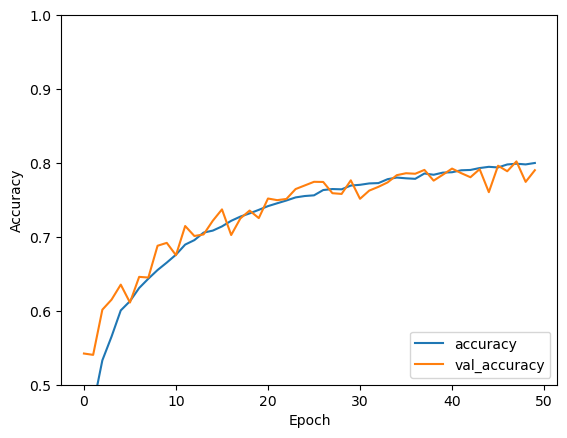

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load dan Normalize Dataset CIFAR10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.15),
])

# Modifikasi Model CNN dengan Batch Normalization dan Regularisasi L2
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), 
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', 
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# Menambahkan Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Fit Model dengan callback EarlyStopping
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping])

# Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Akurasi testing: {test_acc}")
